# FACTORS AFFECTING THE NUMBER OF DEATHS FROM COVID-19 IN COUNTRIES AROUND THE WORLD
## Setting the environment:

In [29]:
setwd("D:/")
getwd()

[1] "D:/"

## Import data

In [30]:
library(readxl)				
test = read_excel("main_data.xlsx", sheet = 1)

## Descriptive statistics
### Statistics of qualitative variables

In [48]:
library(table1) 
output = table1 (~total_deaths + total_vaccinations + population_2020 +aged_70_older+ 
      gdp_per_capita + diabetes_prevalence + low_HDI + medium_HDI + high_HDI, data = test)
css <- '<style type="text/css">@import url(D:/anaconda/envs/r-tutorial/Lib/R/library/table1/table1_defaults_1.0/table1_defaults.css);</style>'
cat(paste(css,output),file="temp.html")
shell("temp.html")

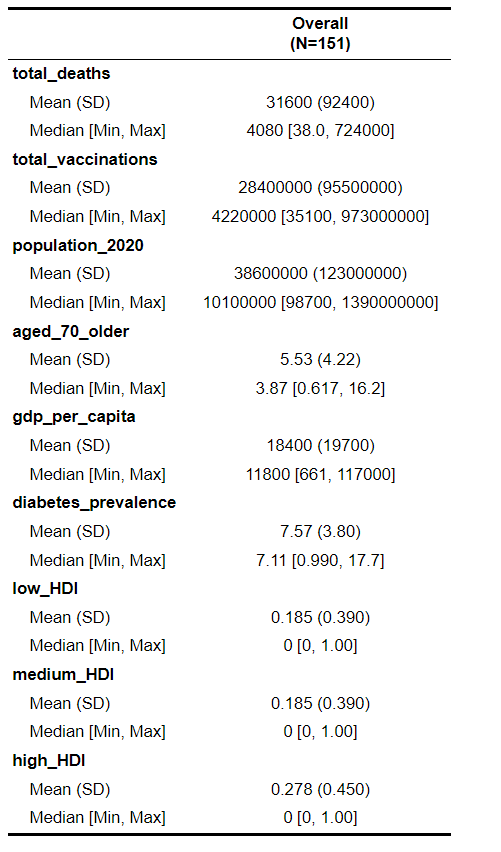

## Human development index statistics

In [36]:
test$develop[test$HDI == 1] = "Low"
test$develop[test$HDI == 2] = "Medium"
test$develop[test$HDI == 3] = "High"
test$develop[test$HDI == 4] = "Very High"

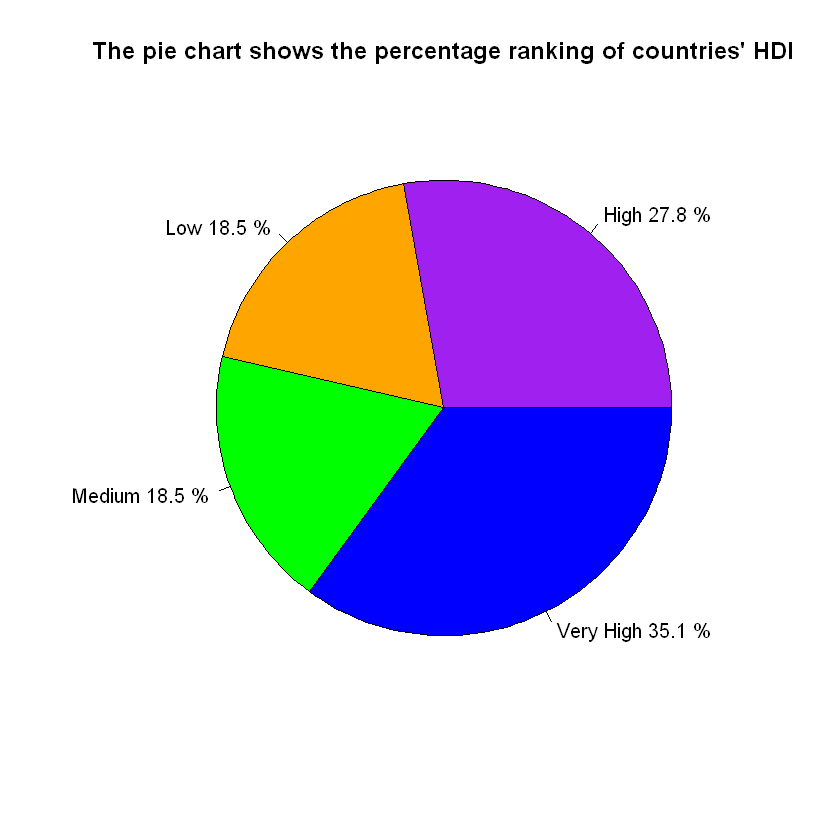

In [34]:
dfa = table (test$develop)
options (digits = 3)
dfb = prop.table(dfa)
dfc = paste(names(dfa), round(dfb*100,digits = 1), "%")
pie(dfa, labels = dfc, col = c("purple","orange","green","blue"), main = "The pie chart shows the percentage ranking of countries' HDI")

## Histogram for the dependent variable

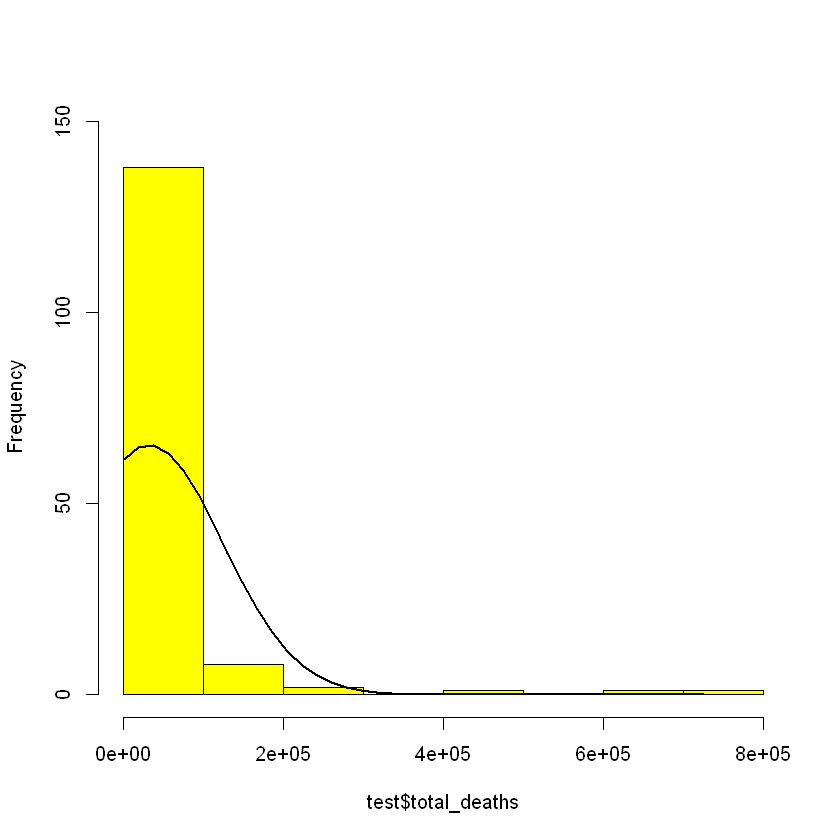

In [37]:
a = hist(test$total_deaths, ylim = c(0,150), col = "yellow", main = "")
b <- seq(min(test$total_deaths), max(test$total_deaths), length = 40) 
c <- dnorm(b, mean = mean(test$total_deaths), sd = sd(test$total_deaths)) 
c <- c * diff(a$mids[1:2]) * length(test$total_deaths) 
lines(b, c, col = "black", lwd = 2)

## Histogram plot after transforming the dependent variable

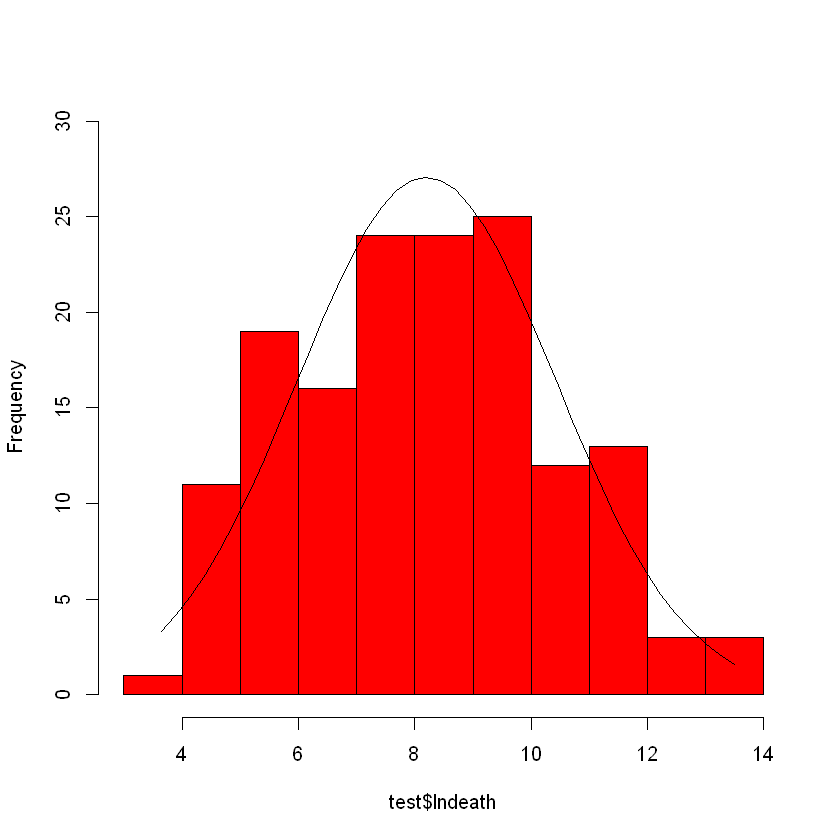

In [38]:
h = hist (test$lndeath, breaks=10, ylim=c(0, 30), col = "red", main = "")
xfit <- seq(min(test$lndeath), max(test$lndeath), length = 40) 
yfit <- dnorm(xfit, mean = mean(test$lndeath), sd = sd(test$lndeath)) 
yfit <- yfit * diff(h$mids[1:2]) * length(test$lndeath) 
lines(xfit, yfit, col = "black", lwd = 1)

## Pearson correlation between variables

In [45]:
cor (test$high_HDI, test$lndeath)
cor (test$high_HDI, test$ln_vaccine)
cor (test$high_HDI, test$ln_pop)
cor (test$high_HDI, test$aged_70_older)
cor (test$high_HDI, test$gdp_per_capita)
cor (test$high_HDI, test$diabetes_prevalence)
cor (test$high_HDI, test$low_HDI)
cor (test$high_HDI, test$medium_HDI)


cor (test$medium_HDI, test$lndeath)
cor (test$medium_HDI, test$ln_vaccine)
cor (test$medium_HDI, test$ln_pop)
cor (test$medium_HDI, test$aged_70_older)
cor (test$medium_HDI, test$gdp_per_capita)
cor (test$medium_HDI, test$diabetes_prevalence)
cor (test$medium_HDI, test$low_HDI)


cor (test$low_HDI, test$lndeath)
cor (test$low_HDI, test$ln_vaccine)
cor (test$low_HDI, test$ln_pop)
cor (test$low_HDI, test$aged_70_older)
cor (test$low_HDI, test$gdp_per_capita)
cor (test$low_HDI, test$diabetes_prevalence)


cor (test$diabetes_prevalence, test$lndeath)
cor (test$diabetes_prevalence, test$ln_vaccine)
cor (test$diabetes_prevalence, test$ln_pop)
cor (test$diabetes_prevalence, test$aged_70_older)
cor (test$diabetes_prevalence, test$gdp_per_capita)


cor (test$gdp_per_capita, test$lndeath)
cor (test$gdp_per_capita, test$ln_vaccine)
cor (test$gdp_per_capita, test$ln_pop)
cor (test$gdp_per_capita, test$aged_70_older)


cor (test$aged_70_older, test$lndeath)
cor (test$aged_70_older, test$ln_vaccine)
cor (test$aged_70_older, test$ln_pop)


cor (test$ln_pop, test$lndeath)
cor (test$ln_pop, test$ln_vaccine)


cor (test$ln_vaccine, test$lndeath)

[1] 0.144

[1] 0.0366

[1] -0.0945

[1] -0.101

[1] -0.173

[1] 0.267

[1] -0.296

[1] -0.296

[1] -0.112

[1] -0.0586

[1] 0.0447

[1] -0.335

[1] -0.31

[1] -0.0746

[1] -0.228

[1] -0.384

[1] -0.387

[1] 0.129

[1] -0.426

[1] -0.4

[1] -0.372

[1] 0.00702

[1] 0.0225

[1] -0.181

[1] -0.0692

[1] 0.245

[1] 0.134

[1] 0.27

[1] -0.125

[1] 0.483

[1] 0.399

[1] 0.346

[1] -0.0371

[1] 0.709

[1] 0.747

[1] 0.891

## Run regression

In [40]:
df1 = lm (data=test, lndeath ~ ln_vaccine + ln_pop + aged_70_older + gdp_per_capita
    + diabetes_prevalence + low_HDI + medium_HDI + high_HDI)

In [41]:
# Summary of results
library(jtools)
library(officer)
library(flextable)
set_summ_defaults(digits = 3, model.info = TRUE, model.fit = TRUE, confint = TRUE, vifs = TRUE, pvals = TRUE, robust = TRUE)
summ (df1)

MODEL INFO:
Observations: 151
Dependent Variable: lndeath
Type: OLS linear regression 

MODEL FIT:
F(8,142) = 116.915, p = 0.000
R² = 0.868
Adj. R² = 0.861 

Standard errors: Robust, type = HC3
-----------------------------------------------------------------------------
                              Est.     2.5%    97.5%   t val.       p     VIF
------------------------- -------- -------- -------- -------- ------- -------
(Intercept)                 -6.186   -7.711   -4.662   -8.024   0.000        
ln_vaccine                   0.514    0.352    0.675    6.302   0.000   7.160
ln_pop                       0.445    0.278    0.613    5.253   0.000   5.874
aged_70_older                0.080    0.034    0.126    3.445   0.001   3.004
gdp_per_capita              -0.000   -0.000   -0.000   -2.789   0.006   2.604
diabetes_prevalence         -0.001   -0.047    0.045   -0.058   0.953   1.522
low_HDI                     -1.698   -2.587   -0.810   -3.777   0.000   7.366
medium_HDI                

## Test the hypothesis

In [42]:
# RESET test to detect model omissions
# Test with y^2, y^3:
library(lmtest)
resettest(df1, power = 2:3 , type = "fitted")
# Test with y^2, y^3, y^4:
resettest(df1, power = 2:4 , type = "fitted")


	RESET test

data:  df1
RESET = 0.4, df1 = 2, df2 = 140, p-value = 0.7



	RESET test

data:  df1
RESET = 0.4, df1 = 3, df2 = 139, p-value = 0.7


In [43]:
#Kiem dinh phuong sai thay doi:
library(lmtest)
bptest(df1)


	studentized Breusch-Pagan test

data:  df1
BP = 14, df = 8, p-value = 0.07


In [44]:
#Kiem dinh phan phoi chuan:
test$residual = residuals(df1)
shapiro.test(test$residual)


	Shapiro-Wilk normality test

data:  test$residual
W = 1, p-value = 0.3
